In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from titanic import credentials, visualization, transformations, models
from titanic.storage import Storage

## Load titanic training dataset

In [3]:
credentials.load()
storage = Storage(bucket = "industrializing-ml-models")

In [4]:
df_train = storage.read_csv('titanic/train.csv')
df_train.describe(include = 'all')

,PassengerId,Survived,Class,Name,Sex,Age,Siblings,ParentsChildren,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Explore relation between class, age and survival rate

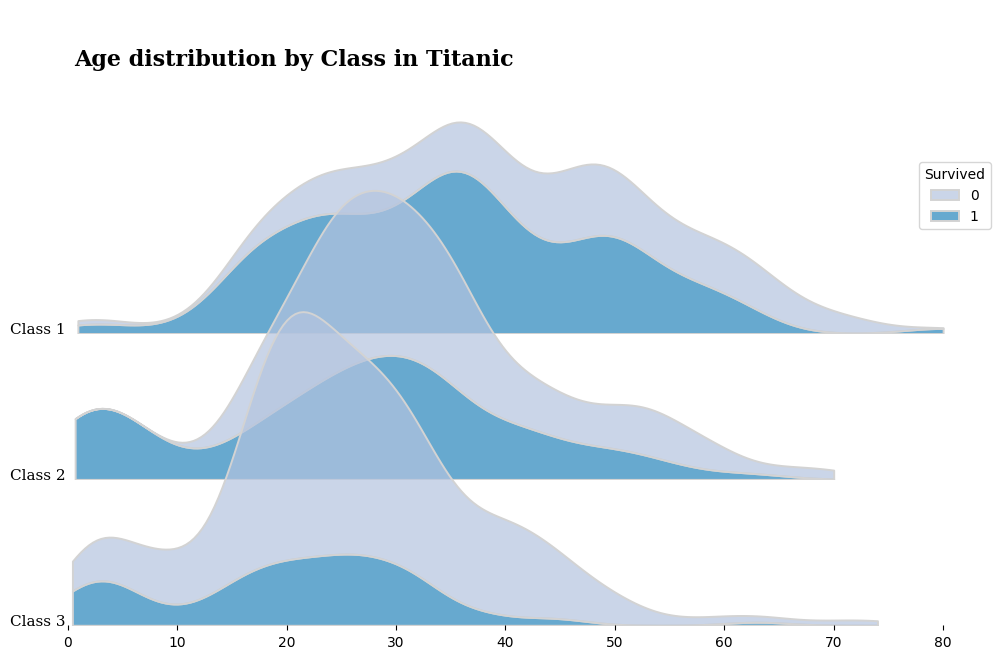

In [5]:
visualization.plot_age_distribution(df_train)

### Add all feature

In [6]:
df_train = transformations.add_all_features(df_train)
df_train

,PassengerId,Survived,Class,Name,Sex,Age,Siblings,ParentsChildren,Ticket,Fare,Cabin,Embarked,Age_F,Sex_F,Embarked_F,FamilySize_F
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,21.5,0,0,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0,1,1,0


### Plot feature correlation matrix

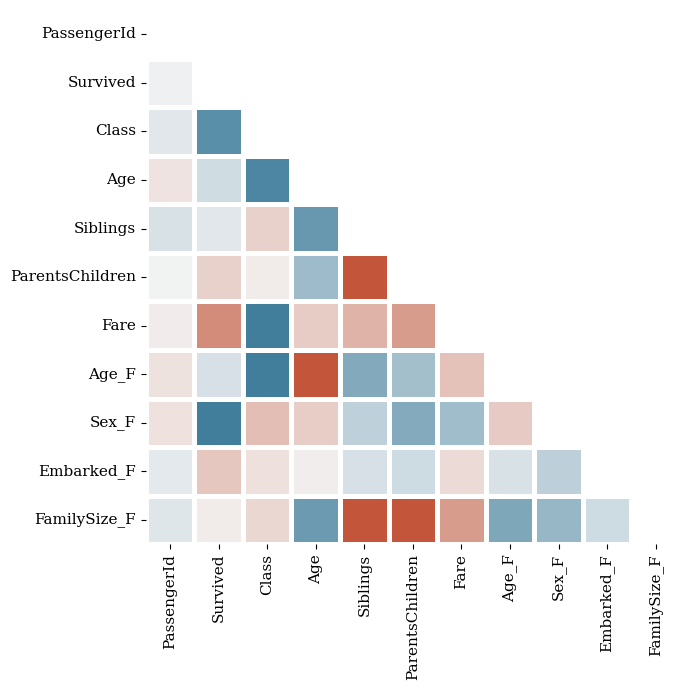

In [7]:
visualization.plot_correlation_matrix(df_train)

### Train classifier

Classifier accuracy: 0.9222030486051194


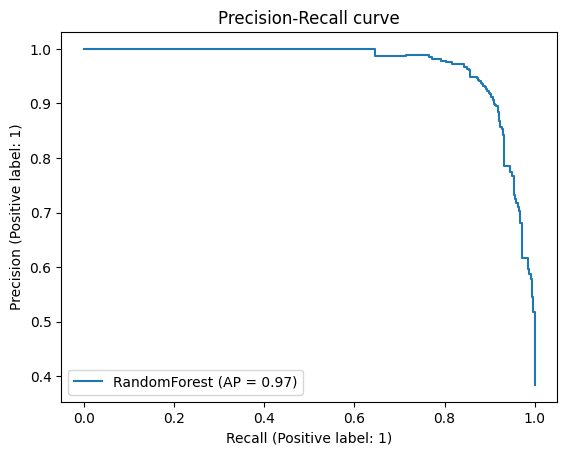

In [8]:
train_features = transformations.select_features_for_ml(df_train)
train_target = transformations.select_target_for_ml(df_train)
classifier, accuracy = models.fit_random_forest(train_features, train_target, plot_roc=True)

print(f"Classifier accuracy: {accuracy}")

### Load the test data set and apply the same data preparation

In [9]:
df_test = storage.read_csv('titanic/test.csv')
df_test = transformations.add_all_features(df_test)
df_test

,PassengerId,Class,Name,Sex,Age,Siblings,ParentsChildren,Ticket,Fare,Cabin,Embarked,Age_F,Sex_F,Embarked_F,FamilySize_F
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,1,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,1,2,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,24.0,1,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,39.0,0,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,38.5,1,0,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,24.0,1,0,0


### Get classifier prediction for test data set and save the results

In [10]:
test_features = transformations.select_features_for_ml(df_test)
test_target = classifier.predict(test_features)
df_test['Survived'] = test_target

storage.write_csv(df_test[['PassengerId', 'Survived']], 'titanic/results.csv')